In [2]:
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

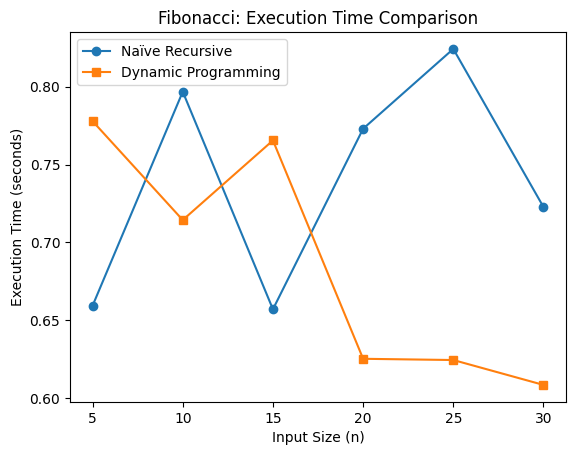

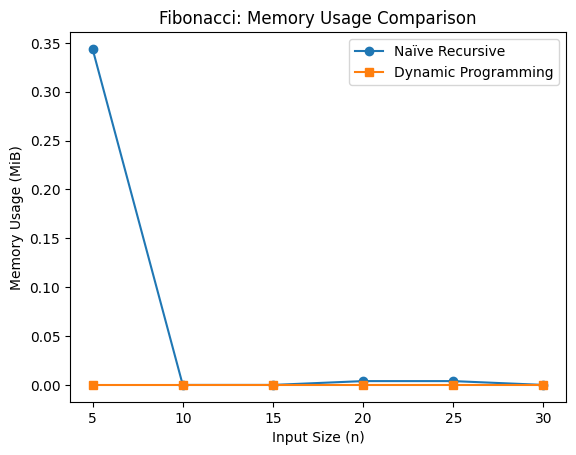

In [4]:
# Naive recursive Fibonacci
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

# Dynamic programming Fibonacci
def fib_dynamic(n):
    if n <= 1:
        return n
    dp = [0] * (n + 1)
    dp[1] = 1
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]
# Experiment setup
input_sizes = [5, 10, 15, 20, 25, 30]
recursive_times, dp_times = [], []
recursive_mem, dp_mem = [], []

for n in input_sizes:
    # Recursive
    start = time.time()
    mem = memory_usage((fib_recursive, (n,)), max_iterations=1, interval=0.01)
    end = time.time()
    recursive_times.append(end - start)
    recursive_mem.append(max(mem) - min(mem))

    # Dynamic
    start = time.time()
    mem = memory_usage((fib_dynamic, (n,)), max_iterations=1, interval=0.01)
    end = time.time()
    dp_times.append(end - start)
    dp_mem.append(max(mem) - min(mem))

# Plot execution time
plt.plot(input_sizes, recursive_times, marker='o', label="Naïve Recursive")
plt.plot(input_sizes, dp_times, marker='s', label="Dynamic Programming")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Fibonacci: Execution Time Comparison")
plt.legend()
plt.show()

# Plot memory usage
plt.plot(input_sizes, recursive_mem, marker='o', label="Naïve Recursive")
plt.plot(input_sizes, dp_mem, marker='s', label="Dynamic Programming")
plt.xlabel("Input Size (n)")
plt.ylabel("Memory Usage (MiB)")
plt.title("Fibonacci: Memory Usage Comparison")
plt.legend()
plt.show()